In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline

This week, we'll be looking at a dataset showing the housing values in the suburbs of Boston. Every row is a different town.

## Housing Values in Suburbs of Boston

The medv variable is the target variable.

Data description  
The Boston data frame has **506 rows and 14 columns**.

This data frame contains the following columns:

**crim**  
per capita crime rate by town.

**zn**  
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**  
proportion of non-retail business acres per town.

**chas**  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**  
nitrogen oxides concentration (parts per 10 million).

**rm**  
average number of rooms per dwelling.

**age**  
proportion of owner-occupied units built prior to 1940.

**dis**  
weighted mean of distances to five Boston employment centres.

**rad**  
index of accessibility to radial highways.

**tax**  
full-value property-tax rate per $10,000.

**ptratio**   
pupil-teacher ratio by town.

**lstat**  
lower status of the population (percent).

**medv**  
median value of owner-occupied homes in $1000s.

I've also added:  

**RM_Discrete**  
1 if average number of rooms per dwelling is greater than 7, 0 if it's 7 or less

In [2]:
boston = pd.read_csv('data/boston_dataset.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,RM_Discrete
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,1


1) First, let's look at the relationship between the RM variable and MEDV. How does the number of rooms per dwelling impact the median value of a home in a given town?

Create a scatterplot between these two variables. Does this look like a strong correlation? Does the relationship look linear?

Text(0.5,0.92,'Relationship between RM and MEDV')

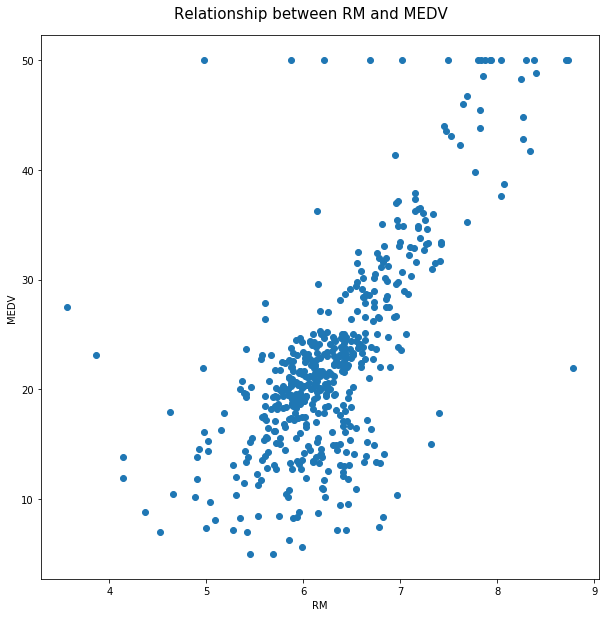

In [39]:
#Relationship between RM and MEDV
#Looks linear
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['RM'], boston['MEDV'])
sorted_order = np.argsort(boston['RM'])
plt.xlabel('RM')
plt.ylabel('MEDV')
fig.suptitle('Relationship between RM and MEDV', fontsize=15, y=0.92)

2) What is the correlation between these two variables?

In [4]:
#Correlation
stats.pearsonr(boston['RM'], boston['MEDV'])[0]

0.6953599470715394

3) Now fit a regression between these two variables. What is the slope? What is the intercept? What is the R-squared value? Given the R-squared value, how well would you say the number of rooms can help you predict what the price of a home will be?

In [5]:
#Without Transformation
boston_slope, boston_intercept, boston_predictions, boston_residuals = utils.evaluate_linear_relationship(boston['RM'], boston['MEDV'])

In [6]:
boston_slope

9.102108981180306

In [7]:
boston_intercept

-34.67062077643854

In [8]:
#R^2 Value
utils.get_r2(boston_predictions, boston['RM'])

82.84838790528319

With an R^2 value of 83, the number of rooms is a fairly good indicator for the price of a home.

4) Now re-run this using the statsmodels OLS function (smf.ols). Are the results (slope, intercept, r-squared value) the same?

In [9]:
#Different results
est = smf.ols('RM~MEDV', boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RM   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        20:33:27   Log-Likelihood:                -371.73
No. Observations:                 506   AIC:                             747.5
Df Residuals:                     504   BIC:                             755.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0876      0.060     85.492      0.000       4.971       5.205
MEDV           0.0531      0.002     21.722      0.000       0.048       0.058
==============================================================================
Omnibus:                      123.606   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.463
Skew:                          -0.840   Prob(JB):                    5.44e-203
Kurtosis:                       9.431   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5) Now fit a regression between the 'RM_Discrete' variable and the 'MEDV' variable. What is the slope? What is the intercept? What is the interpretation of the slope? What is the R-squared value? Given the R-squared value, how well would you say this binary predictor can help you predict what the price of a home will be?

In [10]:
boston_log_slope, boston_log_intercept, boston_log_predictions, boston_log_residuals = utils.evaluate_linear_relationship(boston['RM_Discrete'], np.log(boston['MEDV']))

Text(0.5,0.92,'Relationship between RM_Discrete and MEDV')

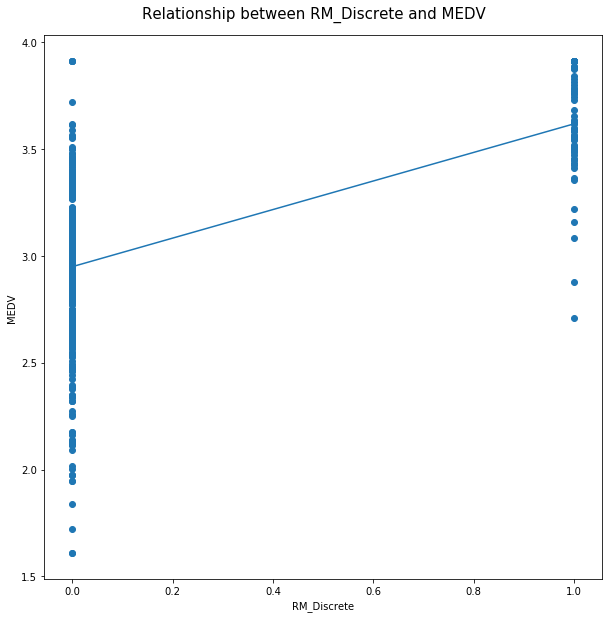

In [11]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['RM_Discrete'], np.log(boston['MEDV']))
sorted_order = np.argsort(boston['RM_Discrete'])
plt.plot(boston['RM_Discrete'][sorted_order], boston_log_predictions[sorted_order])
plt.xlabel('RM_Discrete')
plt.ylabel('MEDV')
fig.suptitle('Relationship between RM_Discrete and MEDV', fontsize=15, y=0.92)

In [12]:
boston_log_slope

0.6688983443799982

In [13]:
boston_log_intercept

2.949909131251968

In [14]:
#R^2 Value
utils.get_r2(boston_log_predictions, boston['RM_Discrete'])

0.4474249951143025

6) Plot the residuals plot for this relationship. Do the residuals look heteroskedastic (not evenly distributed) or homoskedastic (evently distributed)? Remember that values will only show up as 0 or 1 on the x-axis, you are only looking at the distribution on the y-axis.

Text(0.5,0.92,'Relationship between RM_Discrete and MEDV')

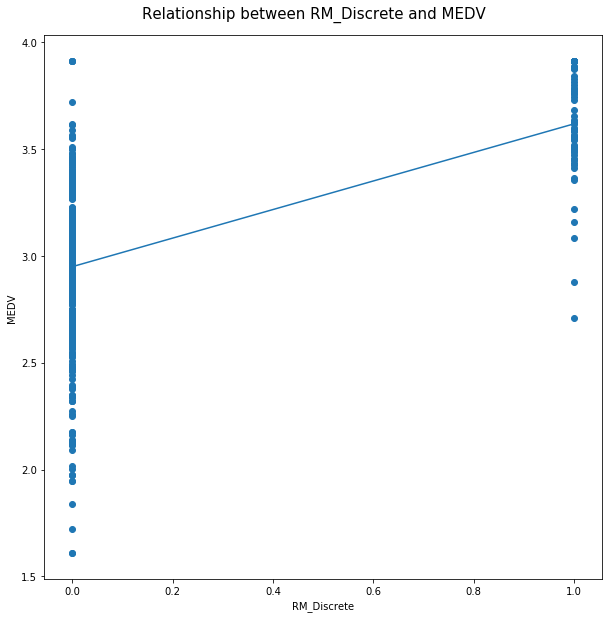

In [15]:
#Heteroskedastic
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['RM_Discrete'], np.log(boston['MEDV']))
sorted_order = np.argsort(boston['RM_Discrete'])
plt.plot(boston['RM_Discrete'][sorted_order], boston_log_predictions[sorted_order])
plt.xlabel('RM_Discrete')
plt.ylabel('MEDV')
fig.suptitle('Relationship between RM_Discrete and MEDV', fontsize=15, y=0.92)

7) Now let's look at the relationship between the 'LSAT' and 'MEDV' variable. How does the percentage of the 'lower status' of a population in a given town affect the median value of a home in that town?

Create a scatterplot between these two variables. Does this look like a strong correlation? Does the relationship look linear?

Text(0.5,0.92,'Relationship between LSTAT and MEDV')

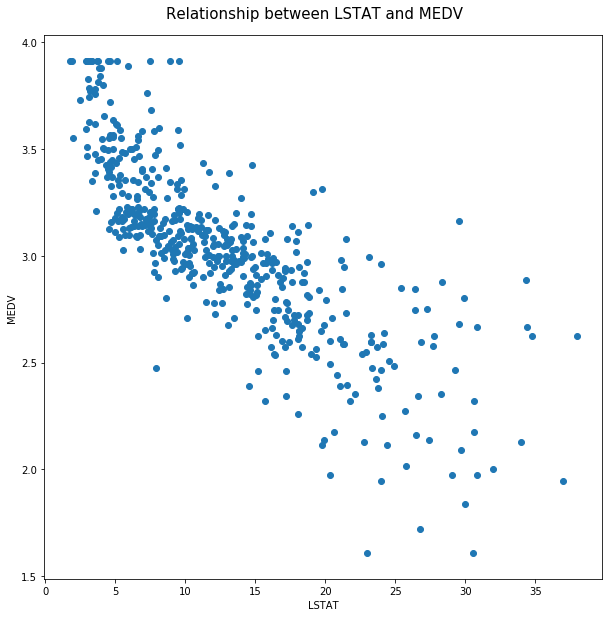

In [17]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['LSTAT'], np.log(boston['MEDV']))
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
fig.suptitle('Relationship between LSTAT and MEDV', fontsize=15, y=0.92)

In [19]:
stats.pearsonr(boston['LSTAT'], boston['MEDV'])[0]

-0.7376627261740147

8) Now evaluate the RMSE between the relationship between the 'LSTAT' and 'MEDV' columns for the polynomials 1 through 20. Which degree of polynomial has the lowest corresponding RMSE?

In [22]:
#RMSE
utils.get_rmse(boston_predictions, boston['LSTAT'])

15.661283219557546

In [24]:
second_order_variables = np.polyfit(boston['LSTAT'], boston['MEDV'], 2)
second_order_variables

array([ 0.04354689, -2.3328211 , 42.86200733])

In [25]:
second_order_function = np.poly1d(second_order_variables)
second_order_predictions = second_order_function(boston['LSTAT'])

Text(0.5,0.92,'LSTAT vs MEDV Poly Regression')

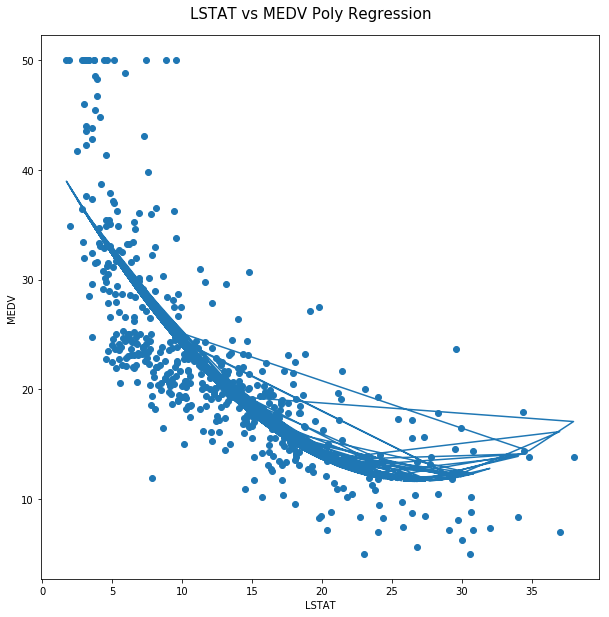

In [26]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['LSTAT'], boston['MEDV'])
sorted_order = np.argsort(boston['LSTAT'])
plt.plot(boston['LSTAT'], second_order_predictions)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
fig.suptitle('LSTAT vs MEDV Poly Regression', fontsize=15, y=0.92)

In [28]:
twentieth_order_variables = np.polyfit(boston['LSTAT'], boston['MEDV'], 20)
twentieth_order_function = np.poly1d(twentieth_order_variables)
twentieth_order_predictions = twentieth_order_function(boston['LSTAT'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [31]:
#RMSE
utils.get_rmse(twentieth_order_predictions, boston['LSTAT'])

17.4353494004137

Text(0.5,0.92,'LSTAT vs MEDV 20th Poly Regression')

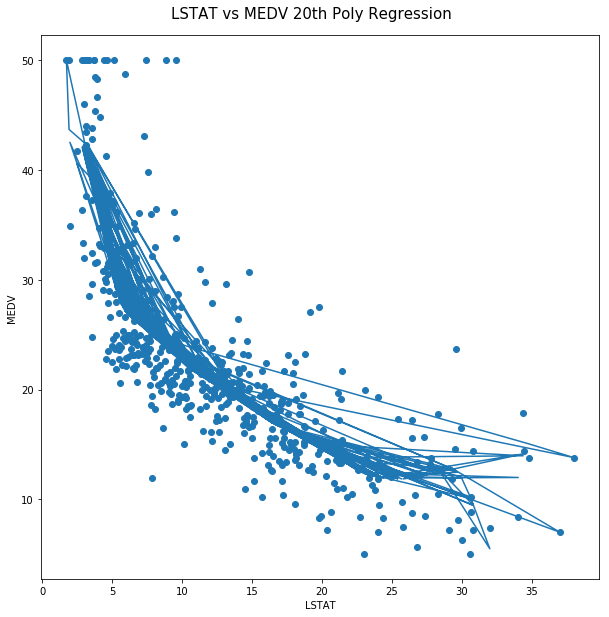

In [32]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['LSTAT'], boston['MEDV'])
sorted_order = np.argsort(boston['LSTAT'])
plt.plot(boston['LSTAT'], twentieth_order_predictions)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
fig.suptitle('LSTAT vs MEDV 20th Poly Regression', fontsize=15, y=0.92)

9) Now split the dataset into training and testing sets like we did in class, and evaluate the RMSE for both the training and testing sets. Plot a graph showing the corresponding RMSE values for the training and testing sets. At what degree polynomial do we approximately have the RMSE for the training and testing sets? Remember that we are not looking for the absolute lowest values necessarily, just the point at which the RMSE doesn't seem to be notably improving any further, and certainly not going higher in either the training or testing sets. Feel free to use both a dataframe and graph to analyze this.

In [33]:
x_train, x_test, y_train, y_test = utils.get_train_test(boston['LSTAT'], boston['MEDV'])

In [35]:
x_train, x_test, y_train, y_test  = utils.get_train_test(boston['LSTAT'], boston['MEDV'])
print('train_values - LSTAT:', x_train)
print('test_values - LSTAT:', x_test)
print('train_values - MEDV:', y_train)
print('test_values - MEDV:', y_test)

train_values - LSTAT: [ 4.98  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27 15.71
 10.26  8.47  6.58 14.67 11.69 11.28 18.72 19.88 16.3  16.51 14.81 17.28
 12.8  11.98 22.6  13.04 27.71 18.35  9.68 11.41  8.77 10.13  4.32  1.98
  4.84  5.81  9.55 10.21 14.15 18.8   9.43  4.81  5.77  3.95  9.22 13.15
 14.44  6.73  9.5   8.05  4.67 10.24  8.1  13.09  8.79  6.72  5.52  7.54
  6.78  8.94 11.97 10.27 12.34  9.1   7.22  6.72  7.51  9.62  6.53 12.86
  5.7   8.81  8.16  6.21 10.59  6.65 11.34  4.21  3.57  9.42  7.67 13.44
 12.33 14.09 12.27 15.55 13.   10.16 16.21 17.09 10.45 15.76 12.04 10.3
 15.37 13.61 14.37 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.26
 11.12 15.03 16.96 16.9  14.59 21.32 18.46 24.16 34.41 26.82 26.42 29.29
 27.8  16.65 29.53 28.32 14.1  12.12 15.79 15.12 15.02 16.14  4.59  6.43
  7.39  1.92  3.32 11.64  9.81 12.14 11.1  14.43 12.03 14.69  9.04  5.33
 10.11  6.29  6.92  5.04  7.56  9.45  4.82  5.68 13.98 13.15  4.45  2.87
  5.03  4.38  2.97  4.08  8.61

In [36]:
twentieth_order_variables = np.polyfit(x_train, y_train, 20)
twentieth_order_function = np.poly1d(twentieth_order_variables)
twentieth_order_train_predictions = twentieth_order_function(x_train)
print('RMSE on Training Set:', utils.get_rmse(twentieth_order_train_predictions, y_train))
twentieth_order_test_predictions = twentieth_order_function(x_test)
print('RMSE on Testing Set:', utils.get_rmse(twentieth_order_test_predictions, y_test))

RMSE on Training Set: 4.917627608171415
RMSE on Testing Set: 5.566079412567364


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Test Data')

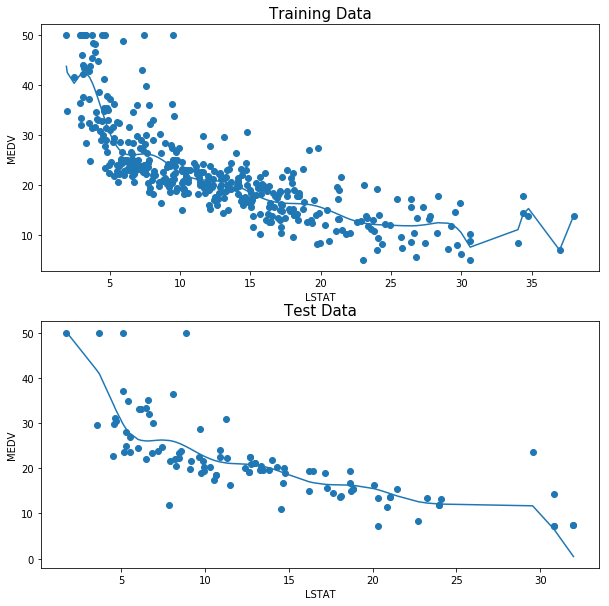

In [37]:
fig, ax=plt.subplots(2,1, figsize=(10,10))
ax[0].scatter(x_train, y_train)
sorted_order = np.argsort(x_train)
ax[0].plot(x_train[sorted_order], twentieth_order_train_predictions[sorted_order])
ax[1].scatter(x_test, y_test)
sorted_order = np.argsort(x_test)
ax[1].plot(x_test[sorted_order], twentieth_order_test_predictions[sorted_order])
ax[0].set_xlabel('LSTAT')
ax[0].set_ylabel('MEDV')
ax[1].set_xlabel('LSTAT')
ax[1].set_ylabel('MEDV')
ax[0].set_title('Training Data', fontsize=15, y=1)
ax[1].set_title('Test Data', fontsize=15, y=1)

10) Using seaborn's 'pairplot' function, run a pairplot of this dataset and look at the relationship between the 'MEDV' variable and the other continuous varibles in the dataset. Which variables does MEDV look to have the strongest (positive) correlation with?

BONUS: 11) Now run a multivariate regression using the following variables as predictors:

ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT

Against MEDV as a response variable.

Which of these varibles have a statistically significant slope? What is the total R-squared value of the model?